# <center> Restaurant Food Court

### Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict the cost of a two person meal.

Dataset Attributes

   - TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

   - RESTAURANT_ID: A unique ID for each restaurant.
   - CUISINES: The variety of cuisines that the restaurant offers.
   - TIME: The open hours of the restaurant.
   - CITY: The city in which the restaurant is located.
   - LOCALITY: The locality of the restaurant.
   - RATING: The average rating of the restaurant by customers.
   - VOTES: The overall votes received by the restaurant.
   - COST: The average cost of a two-person meal.

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Restaurant%20Food%20Cost

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Test.xlsx

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx


In [2]:
import warnings
warnings.filterwarnings('ignore')

### Retriving Dataset

In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_excel('Data_Train.xlsx')

### 1: Performed EDA (with proper visualization)

In [4]:
print(df.shape)
df.head()

(12690, 9)


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [6]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [7]:
df['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

In [8]:
import numpy as np

# Replace 'NEW' and '-' with NaN in the 'RATING' column
df['RATING'] = df['RATING'].replace(['NEW', '-'], np.nan)

# Convert 'RATING' to float
df['RATING'] = df['RATING'].astype(float)

In [9]:
# Convert 'VOTES' to integer
df['VOTES'] = df['VOTES'].str.replace(' votes', '')  # Remove the 'votes' suffix
df['VOTES'] = df['VOTES'].astype(float).fillna(0).astype(int)  # Convert to integer and fill missing values with 0

# Print the data types of columns after correction
print(df.dtypes)

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES              int32
COST               int64
dtype: object


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  object 
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  object 
 3   TIME           12690 non-null  object 
 4   CITY           12578 non-null  object 
 5   LOCALITY       12592 non-null  object 
 6   RATING         11486 non-null  float64
 7   VOTES          12690 non-null  int32  
 8   COST           12690 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 842.8+ KB


In [11]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING           1204
VOTES               0
COST                0
dtype: int64

In [12]:
df.describe()

,RESTAURANT_ID,RATING,VOTES,COST
count,12690.000000,11486.000000,12690.000000,12690.000000
mean,7759.134121,3.785452,376.231127,655.252246
std,4504.874150,0.422089,810.946942,627.003540
min,0.000000,2.000000,0.000000,20.000000
25%,3863.250000,3.500000,39.250000,300.000000
50%,7740.000000,3.800000,132.000000,500.000000
75%,11688.750000,4.100000,405.000000,800.000000
max,15573.000000,4.900000,41186.000000,14000.000000


In [13]:
# Remove rows with missing values
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

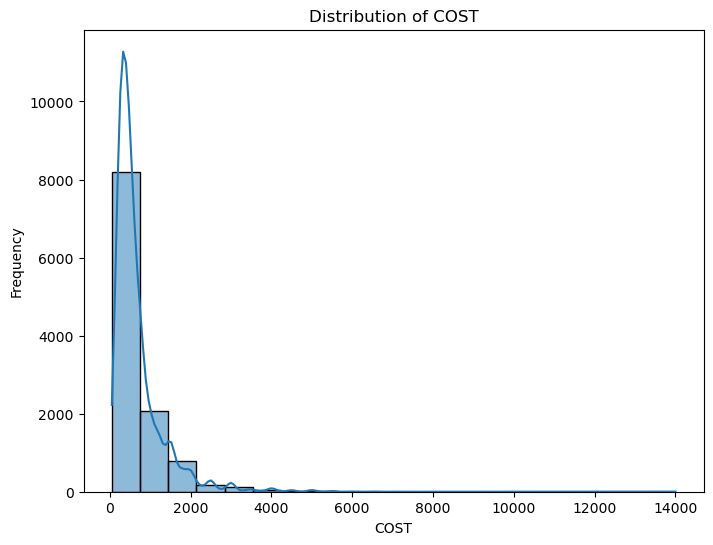

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data visualization
# Example: Histogram of CGPA
plt.figure(figsize=(8, 6))
sns.histplot(df['COST'], bins=20, kde=True)
plt.title('Distribution of COST')
plt.xlabel('COST')
plt.ylabel('Frequency')
plt.show()


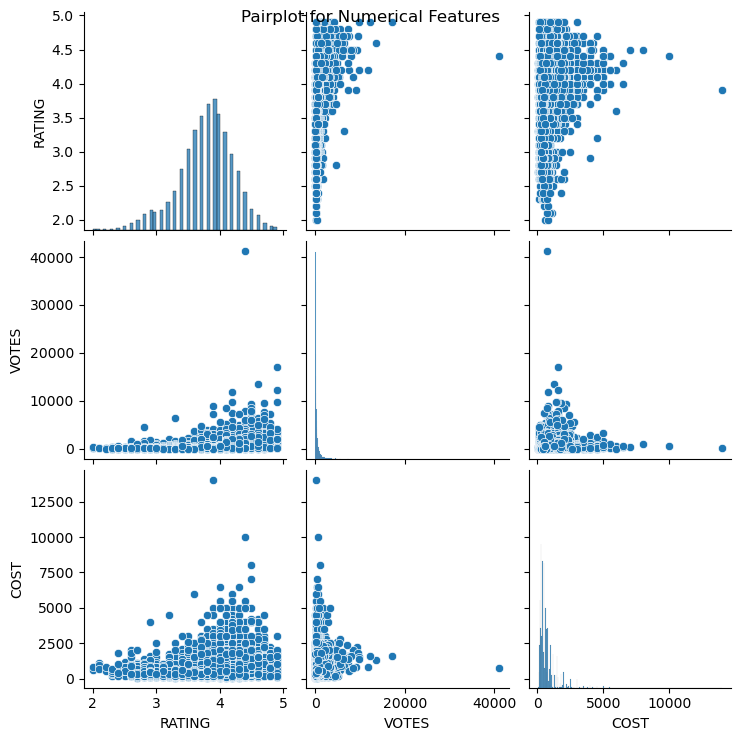

In [16]:
# Analysis plots for numerical features
numerical_features = ['RATING', 'VOTES', 'COST']

# Pairplot for numerical features
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot for Numerical Features')
plt.show()


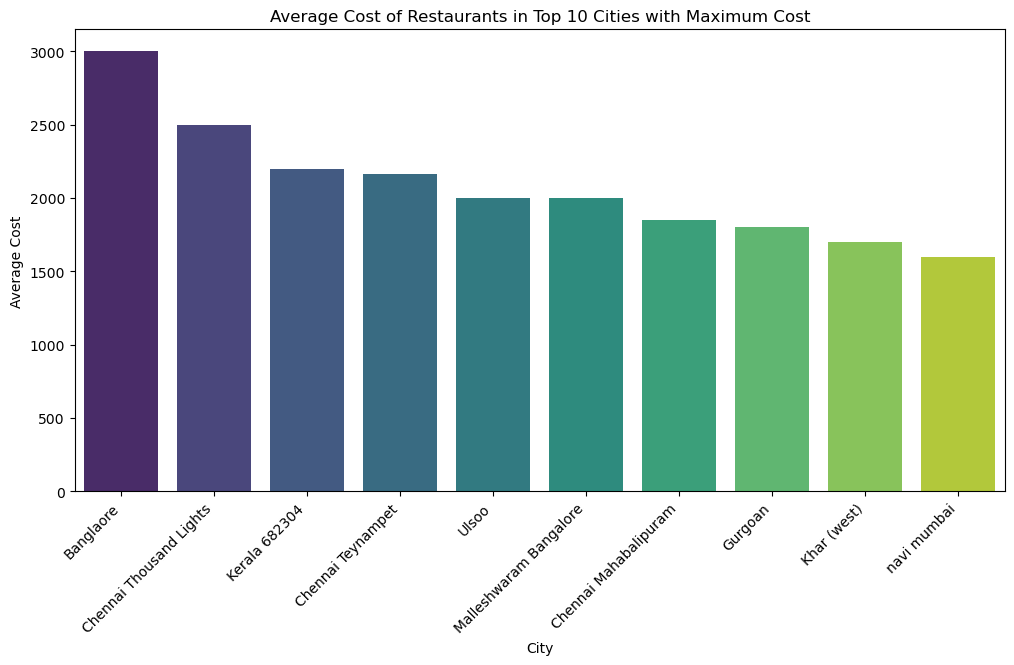

In [17]:
# Calculate the average cost for each city
avg_cost_per_city = df.groupby('CITY')['COST'].mean().sort_values(ascending=False)

# Select the top 10 cities with the highest average cost
top_10_cities = avg_cost_per_city.head(10)

# Create the barplot for the top 10 cities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='viridis')
plt.title('Average Cost of Restaurants in Top 10 Cities with Maximum Cost')
plt.xlabel('City')
plt.ylabel('Average Cost')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Calculate the average rating for each cuisine
avg_rating_per_cuisine = df.groupby('CUISINES')['RATING'].mean().sort_values(ascending=False)

# Select the top 5 cuisines with the highest average rating
top_10_cuisines = avg_rating_per_cuisine.head(10)

# Print the top 5 cuisines with the highest average rating
print("Top 10 Cuisines with Highest Average Rating:")
print(top_10_cuisines)

# Create the barplot for the top 5 cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, palette='coolwarm')
plt.title('Top 10 Cuisines with Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


### 2: Check outliers if present remove it

In [18]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_cleaned

# Apply the remove_outliers_iqr function to the 'COST' column of the 'df' dataset
df_cleaned = remove_outliers_iqr(df, 'COST')

# Display the shape of the original and cleaned datasets to see how many outliers were removed
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)


Original dataset shape: (11393, 9)
Cleaned dataset shape: (10550, 9)


### 3: Check multicollinearity if present rewove it

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

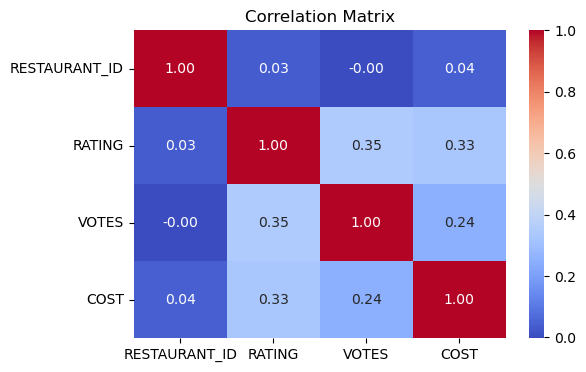

Multicollinear features: set()
Filtered dataset shape: (11393, 9)


In [20]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

# Check for multicollinearity using correlation coefficients
threshold = 0.5  # Define a threshold for correlation coefficients
multicollinear_features = set()  # Initialize an empty set to store multicollinear features

# Iterate over pairs of features in the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            multicollinear_features.add(feature_i)
            multicollinear_features.add(feature_j)

# Remove multicollinear features from the dataset
df_filtered = df.drop(columns=multicollinear_features)

# Display the list of multicollinear features and the shape of the filtered dataset
print("Multicollinear features:", multicollinear_features)
print("Filtered dataset shape:", df_filtered.shape)


### 4: Check Skewness, remove 

In [21]:
import numpy as np

# Check skewness of VOTES' column
print("Skewness of 'VOTES' column:", df['VOTES'].skew())

# Apply log transformation to 'VOTES' column
df['VOTES'] = np.log1p(df['VOTES'])

# Check skewness again after transformation
print("Skewness of 'VOTES' column after transformation:", df['VOTES'].skew())


Skewness of 'VOTES' column: 14.13618525164433
Skewness of 'VOTES' column after transformation: -0.00015222193396733098


### 5: Use standard scaler

In [23]:
from sklearn.preprocessing import StandardScaler

# Extract numerical features
numerical_features = [ 'VOTES','RATING']  # Add more numerical features if needed

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features].head(5)

,VOTES,RATING
0,-0.835314,-0.436802
1,-1.173780,0.985390
2,0.220119,0.037262
3,-1.326086,0.748358
4,0.014301,0.037262


### 6: Check VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extract the numerical features for which you want to calculate VIF
numerical_features = ['VOTES', 'RATING']  # Add more numerical features if needed

# Create a dataframe containing only the numerical features
numerical_df = df[numerical_features]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_df.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_df.values, i) for i in range(len(numerical_df.columns))]

# Display the VIF values
print(vif_data)


  Feature       VIF
0   VOTES  1.452932
1  RATING  1.452932


### 7: Apply feature scalling method on numerical feature

In [25]:
from sklearn.preprocessing import StandardScaler

# Extract numerical features
numerical_features = ['VOTES', 'RATING']  # Add more numerical features if needed

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features].head(5)

,VOTES,RATING
0,-0.835314,-0.436802
1,-1.173780,0.985390
2,0.220119,0.037262
3,-1.326086,0.748358
4,0.014301,0.037262


### 8: Resampling to balance the class(if problem is classification)

In [26]:
# Not a classification problem

### 9: Apply feature selection method

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Define your features X and target variable y
X = df[['RATING', 'VOTES']]  # Select numerical features
y = df['COST']

# Initialize RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Fit the model
rf_regressor.fit(X, y)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


RATING: 0.2968569428946719
VOTES: 0.7031430571053282


### 10: Split the data into feature and target variable x and y

In [28]:
X = df[['VOTES','RATING']]  
y = df['COST']

### 11: Divide data into 4 part,  X_train, y_train, x_test, y_test by using train test split method

In [30]:
from sklearn.model_selection import train_test_split

# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8544, 2)
y_train shape: (8544,)
X_test shape: (2849, 2)
y_test shape: (2849,)


### 12: Building models and checking cross validation score

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Machine': SVR()
}

# Perform cross-validation for each model
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)  # Convert negative mean squared error to root mean squared error
    print(f"{model_name}: Mean RMSE: {rmse_scores.mean()}")



Linear Regression: Mean RMSE: 597.0465219637201
Random Forest: Mean RMSE: 678.2239261607936
Decision Tree: Mean RMSE: 799.2373255095872
Gradient Boosting: Mean RMSE: 589.6087766740809
K-Nearest Neighbors: Mean RMSE: 647.9195933688428
Support Vector Machine: Mean RMSE: 620.4901692924122


### 13: Find best model

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Machine': SVR()
}

# Dictionary to store mean RMSE scores for each model
mean_rmse_scores = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)  # Convert negative mean squared error to root mean squared error
    mean_rmse = rmse_scores.mean()
    mean_rmse_scores[model_name] = mean_rmse
    print(f"{model_name}: Mean RMSE: {mean_rmse}")

# Find the best model based on mean RMSE
best_model = min(mean_rmse_scores, key=mean_rmse_scores.get)
print("\nBest Model:", best_model)
print("Mean RMSE:", mean_rmse_scores[best_model])


Linear Regression: Mean RMSE: 597.0465219637201
Random Forest: Mean RMSE: 678.6606310708015
Decision Tree: Mean RMSE: 799.6093969520095
Gradient Boosting: Mean RMSE: 589.4694497631957
K-Nearest Neighbors: Mean RMSE: 647.9195933688428
Support Vector Machine: Mean RMSE: 620.4901692924122

Best Model: Gradient Boosting
Mean RMSE: 589.4694497631957


### 14: Hyper parameters tunning

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the hyperparameters distributions
param_dist = {
    'n_estimators': randint(50, 100)}  # Number of trees in the forest

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Initialize RandomizedSearchCV with the RandomForestRegressor and hyperparameters distributions
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform randomized search
random_search.fit(X, y)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = np.sqrt(-random_search.best_score_)  # Convert negative mean squared error to RMSE

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best RMSE:", best_score)


Best Parameters: {'n_estimators': 78}
Best RMSE: 677.0058375456814


### 15: Save the model by using job lib method


In [38]:
# Import joblib for model saving (for scikit-learn versions before 0.23)
from sklearn.ensemble import RandomForestClassifier
import joblib  # Import joblib directly

# Save the trained model
joblib.dump(random_search, 'model1.pkl')

['model1.pkl']

### 16: Load the data by using joblib method 

In [39]:
import joblib

# Load the trained model
loaded_model = joblib.load('model1.pkl')
print('Loaded Model', loaded_model)

Loaded Model RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025B4BA27090>},
                   random_state=42, scoring='neg_mean_squared_error')


### 17: Use the test dataset file to predict the target variable

In [67]:
import pandas as pd
import joblib

# Load the trained model
trained_model = joblib.load('model1.pkl')

# Load the test dataset
test_df = pd.read_excel('Data_Test.xlsx')

# Preprocess the test dataset (assuming preprocessing steps have been defined)
# Apply the same preprocessing steps as used for the training dataset

# Assuming 'X_test' contains the preprocessed feature variables of the test dataset
# X_test = preprocess(test_df)

# Make predictions on the test dataset
predictions = trained_model.predict(X_test)

# If ground truth labels are available for evaluation
# Load the ground truth labels
# true_labels = test_df['COST']

# Evaluate the performance of the model on the test dataset
# For regression tasks, you can use metrics like RMSE, MAE, R-squared, etc.
# For classification tasks, you can use metrics like accuracy, precision, recall, F1-score, etc.
# evaluation_metric = evaluate_performance(predictions, true_labels)

# Print predictions (and evaluation metric if available)
print(predictions)
# print(evaluation_metric)


[ 602.30856379  656.15562678  652.56410256 ... 2691.66666667  318.16239316
  331.18703464]
